# Set Variables

In [ ]:
# -------- dataset
software_name = "Camel"
# software_name = "CloudStack"
# software_name = "Geode"
# software_name = "Hbase"


# --------
my_keyword_Based = True
# my_keyword_Based = False


# -------- my_conv_kernel_output_channel & output_version
my_conv_kernel_output_channel = 64
# outp_version
# v2: 64 filter
# v3: 8  filter
output_version = 2 if my_conv_kernel_output_channel == 64 else 3


# -------- my_balance_train & file_subversion
# my_balance_train = True
my_balance_train = False
file_subversion = ".2-balanced" if my_balance_train else ".1-imbalance"

In [ ]:
dataset_file_names = {
    "Camel":      "Camel_DE - v.02",
    "CloudStack": "CloudStack_DE - v.01",
    "Geode":      "Geode_DE - v.01",
    "Hbase":      "Hbase_DE - v.01"
}

dataset_file_name = dataset_file_names[software_name]

# Google Colab

In [ ]:
# Libs
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.6 MB/s 
     |████████████████████████████████| 930 kB 32.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'


In [ ]:
# project folder path
project_folder = "gdrive/MyDrive/Colab Notebooks/paper/"

# data folder path
data_folder =    "00- My Data/one-phase method/"

# output folder path
output_folder =  "01- Jupyter Notebook/50- one-phase method _ CNN/00. Output/"

In [ ]:
# dataset folder path
dataset_folder = software_name + "/"

# output data-folder path
output_data_folder = project_folder + output_folder + dataset_folder + dataset_file_name + "/"

In [ ]:
pre_path_outputs = {}
for k, v in dataset_file_names.items():
    pre_path_outputs[k] = tempPre + tempOutput + k + "/" + sub_folders[k] + "/" + v + "/"

# Libs

In [ ]:
import json
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from operator import truediv

from matplotlib.ticker import MaxNLocator

# Config

In [ ]:
mypaths = {}

for k, v in dataset_file_names.items():
    if my_keyword_Based:
        mypaths[k] = pre_path_outputs[k] + "performances/tfidf-performance-v{}{}.json".format(output_version, "{}")
    else:
        mypaths[k] = pre_path_outputs[k] + "performances/w2v-performance-v{}{}.json".format(output_version, "{}")
    
    # -----
    
    if my_balance_train:
        mypaths[k] = mypaths[k].format(".2-balanced")
    else:
        mypaths[k] = mypaths[k].format(".1-imbalance")

In [ ]:
mypaths

{'camel': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/camel/camel_DE/camel_DE - v.02/performances/tfidf-performance-v2.1-imbalance.json',
 'cloudstack': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/cloudstack/cloudstack_DE/cloudstack_DE - v.01/performances/tfidf-performance-v2.1-imbalance.json',
 'geode': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/geode/geode_DE/geode_DE - v.01/performances/tfidf-performance-v2.1-imbalance.json',
 'hbase': 'E:/darsy/00/02- arshad/10- paper code/01- Jupyter Notebook/Direct Method/00. Output/hbase/hbase_DE/hbase_DE - v.01/performances/tfidf-performance-v2.1-imbalance.json'}

In [ ]:
preprocessing_params = {
    "keyword_Based": my_keyword_Based
}

In [ ]:
bcd_colours = ["blue", "green", "red"]

# my_whole_datas

In [ ]:
my_whole_datas = {}
for k, v in mypaths.items():
    with open(v) as filehandle:
        my_whole_datas[k] = json.load(filehandle)

In [ ]:
class_labels = my_whole_datas["camel"]["preprocessing_params"]["bug_classes"]
epochs = my_whole_datas["camel"]["train_params"]["epochs"]

In [ ]:
print(class_labels)
print(epochs)

[0, 1]
20


In [ ]:
best_step_labels = {}
best_step_indexs = {}
datas = {}

for k, mwd in my_whole_datas.items():
    best_step_labels[k] = mwd["model_results"]["validation"]["best_at_step"]
    best_step_indexs[k] = mwd["model_results"]["validation"]["best_at_step"] - 1
    datas[k] = mwd["model_results"]

In [ ]:
print(best_step_labels)
print(best_step_indexs)

{'camel': 3, 'cloudstack': 2, 'geode': 1, 'hbase': 4}
{'camel': 2, 'cloudstack': 1, 'geode': 0, 'hbase': 3}


In [ ]:
ls = "solid"
lw = 1
lw_test = 5
marker = "."
marker_test = "o"
# train_data_status = train_data_status

colours = {
    "camel":      "red",
    "cloudstack": "blue",
    "geode":      "green",
    "hbase":      "orange"
}

In [ ]:
def plot_acc_cost_():
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

    mymetrics = ["accuracy", "cost"]
    my_x = range(1, epochs + 1, 1)

    for ax, metric in zip(axes, mymetrics):
        ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))

        if metric == "accuracy":
            for k, mwd in my_whole_datas.items():
                ax.set_ylim([0, 100])
                ax.scatter(best_step_labels[k], datas[k]["validation"]["best_acc"], 
                           label="best on Validation Dataset", color="cyan", lw=lw_test, marker=marker_test)
        else:
            for k, mwd in my_whole_datas.items():
                ax.set_ylim([0, 300])
                ax.scatter(best_step_labels[k], datas[k]["validation"]["cost"][best_step_indexs[k]], 
                           label="best on Validation Dataset", color="cyan", lw=lw_test, marker=marker_test)
        
        for k, mwd in my_whole_datas.items():
#             ax.plot(my_x, metric, data=self.data["train"], label="Train-{} Dataset".format(self.train_data_status), 
#                     color="red", linestyle=self.ls, lw=self.lw, marker=self.marker)

            ax.plot(my_x, metric, data=datas[k]["validation"], label="Validation Dataset - {}".format(k), 
                    color=colours[k], linestyle=ls, lw=lw, marker=marker)
        
        ax.set_xlim([0, 30])
        ax.set_xlabel("epoch")
        ax.set_ylabel(metric)
        ax.legend()
        ax.grid(True)

        ax.get_xaxis().set_ticks( list(range(1, epochs + 1)) )
    # --- end for

    fig.tight_layout(pad=3.0)

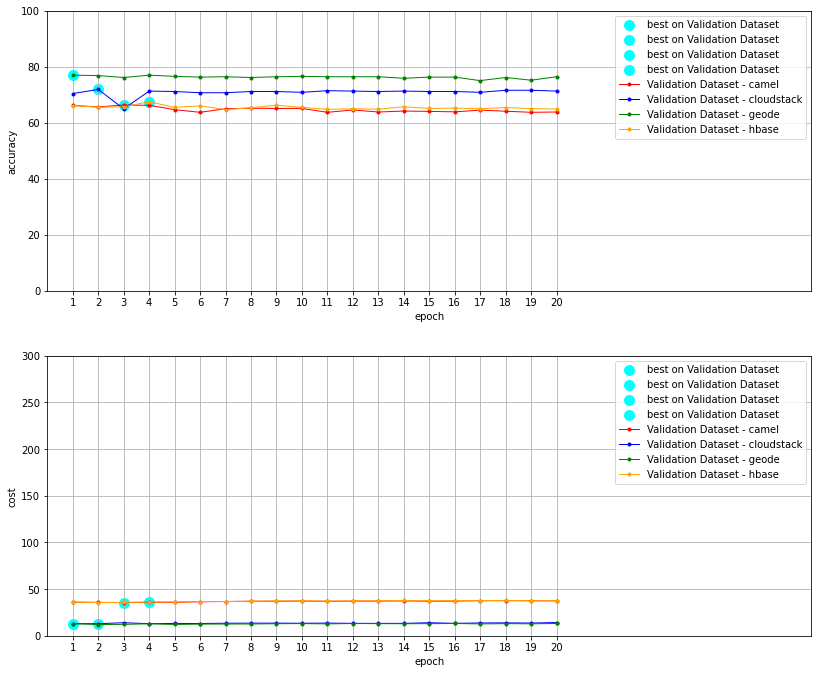

In [ ]:
plot_acc_cost_()

# Plot results

In [ ]:
class PlotResults():
    def __init__(self, train_data_status):
        self.ls = "solid"
        self.lw = 1
        self.lw_test = 5
        self.marker = "."
        self.marker_test = "o"
        self.class_labels = None
        self.data = None
        self.epochs = None
        self.train_data_status = train_data_status
    
    
    def load_results(self, result_path):
        with open(result_path) as filehandle:
            whole_data = json.load(filehandle)
        self.class_labels = whole_data["preprocessing_params"]["bug_classes"]
        self.epochs = whole_data["train_params"]["epochs"]
        self.best_step_index = whole_data["model_results"]["validation"]["best_at_step"] - 1
        self.best_step_label = whole_data["model_results"]["validation"]["best_at_step"]
        
        self.class_distributions = whole_data["class_distributions"]
        self.data = whole_data["model_results"]
    
    
    # ******************************* acc, cost *******************************
    
    def plot_acc_cost_(self):
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
        
        mymetrics = ["accuracy", "cost"]
        my_x = range(1, self.epochs + 1, 1)
        
        for ax, metric in zip(axes, mymetrics):
            ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))
            
            if metric == "accuracy":
                ax.set_ylim([0, 100])
                ax.scatter(self.best_step_label, self.data["validation"]["best_acc"], 
                           label="best on Validation Dataset", color="cyan", lw=self.lw_test, marker=self.marker_test)
            else:
                ax.set_ylim([0, 300])
                ax.scatter(self.best_step_label, self.data["validation"]["cost"][self.best_step_index], 
                           label="best on Validation Dataset", color="cyan", lw=self.lw_test, marker=self.marker_test)
            
            ax.plot(my_x, metric, data=self.data["train"], label="Train-{} Dataset".format(self.train_data_status), 
                    color="red", linestyle=self.ls, lw=self.lw, marker=self.marker)
            
            ax.plot(my_x, metric, data=self.data["validation"], label="Validation Dataset", 
                    color="blue", linestyle=self.ls, lw=self.lw, marker=self.marker)
            
            ax.set_xlabel("epoch")
            ax.set_ylabel(metric)
            ax.legend()
            ax.grid(True)
            
            ax.get_xaxis().set_ticks( list(range(1, self.epochs + 1)) )
        # --- end for
        
        fig.tight_layout(pad=3.0)
        self.other_results()
    
    
    def other_results(self):
        print("** {} **".format(self.train_data_status))
        titles = ["validation_best_acc", "validation_best_acc_at_step", "epochs", "train accuracy", "cost"]
        titles = self.set_strings_to_equal_len_(titles)
        
        # accuracy
        tempTrAcc = round(self.data["train"]["accuracy"][self.best_step_index], 1)
        print("{}: {:2.1f}".format(titles[3], tempTrAcc) )
        
        tempValAcc = round(self.data["validation"]["best_acc"], 1)
        print("{}: {:2.1f}".format(titles[0], tempValAcc) )
        print("{}: {}".format(titles[1], self.data["validation"]["best_at_step"]))
        print("{}: {}".format(titles[2], self.epochs))
        
        # cost
        print()
        print("** {} **".format(self.train_data_status))
        print("{}: {:2.4f}".format(titles[4], self.data["validation"]["cost"][self.best_step_index]))
    
    
    def set_strings_to_equal_len_(self, words):
        max_len = 0
        longest_string_length = len(max(words, key=len))
        
        w = []
        for i, word in enumerate(words):
            temp = longest_string_length - len(word)
            w.append(word + " " * temp)
        return w
    
    
    # ******************************* confustion matrix *******************************
    
    def plot_confusion_matrices(self):
        
        fig_cf, axes_cd = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
        fig_cf.suptitle("Seaborn Confusion Matrix with labels")
        fig_cf.supxlabel("--Predicted-- Bug Report Category")
        fig_cf.supylabel("--Actual-- Bug Report Category")
        
        datasetNames = ["validation", "train"]
        i = 0
        
        for cfax, datasetName in zip(axes_cd, datasetNames):
            if datasetName == "train":
                mycbar = True
            else:
                mycbar = False
                
            tempCF = self.data[datasetName]["confusion_matrix"]
            cf_matrix = tempCF[self.best_step_index]
            cf_matrix = np.array(cf_matrix)
            
            calcmet = CalculateMetrics(cf_matrix)
            precision = calcmet.calc_precision()
            precision = [round(elem, 2) for elem in precision]
            
            recall = calcmet.calc_recall()
            recall = [round(elem, 2) for elem in recall]
            
            f1_score = calcmet.calc_f1_score()
            f1_score = [round(elem, 2) for elem in f1_score]
            
            print("-" * 15, datasetName)
            print("precision: ", precision)
            print("recall:    ", recall)
            print("f1_score:  ", f1_score)
            
            snax = sns.heatmap(cf_matrix / np.sum(cf_matrix), 
                               annot=True, fmt=".2%", cmap="Blues", ax=cfax, vmin=0, vmax=1, 
                               cbar=mycbar, annot_kws={"size": 12})
            
            if datasetName == "train":
                snax.set_title("[{}-{}]\n".format(datasetName, self.train_data_status))
            else:
                snax.set_title("[{}]\n".format(datasetName))
            
            labels = list(map(str, self.class_labels))
            
            snax.xaxis.set_ticklabels(labels)
            snax.yaxis.set_ticklabels(labels)
            i += 1
        
        fig_cf.tight_layout(w_pad=6.0)
    
    
    # ******************************* class distribution *******************************
    
    def plot_class_distribution(self):
        # plot totlal class distribution for splited and whole dataset
        for dataName, v in self.class_distributions.items():
            print("-" * 15, dataName)
            tempCDist = ClassDistribution(v)
            tempCDist.calc_ratios()
            print("ratios     : ", tempCDist.ratios)
            tempCDist.calc_percentage()
            print("percentages: ", tempCDist.percentage)
            tempCDist.plot_data(dataName)
            print("\n")

## flow_plot_on_data

In [ ]:
def flow_plot_on_data(file_subversion, train_data_status, mypath):
    result_path = mypath.format(file_subversion)
    print(result_path)
    if os.path.isfile(result_path):
        plr = PlotResults(train_data_status)
        plr.load_results(result_path)

        plr.plot_acc_cost_()
        plr.plot_confusion_matrices()
        return plr
    else:
        print("There is no such file.")

In [ ]:
if on_google_colab:
    if preprocessing_params["keyword_Based"]:
        temp = "tfidf"
    else:
        temp = "w2v"
    myp = mypaths[temp]["output_performance"]

else:
    if preprocessing_params["keyword_Based"]:
        temp = "tfidf"
    else:
        temp = "w2v"
    myp = mypaths[temp]["output_performance"]

## on imbalance data

In [ ]:
plr1 = flow_plot_on_data(mypaths["file_subversion"]["im"], "imbalance", myp)

## on balanced data

In [ ]:
plr2 = flow_plot_on_data(mypaths["file_subversion"]["ba"], "balanced", myp)

## class_distribution

In [ ]:
plr1.plot_class_distribution()